# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline

# import numpy and pandas
import numpy as np
import pandas as pd

# import scipy
import scipy.stats as stats
import statsmodels.api as sm

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
# I don't multiply the value to be expressed in millions
fifa['ValueNumeric'] = fifa['Value'].str.strip('€KM').astype(float)
fifa['ValueNumeric']
# type(fifa['Num value'][0])

0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
         ...  
18202     60.0
18203     60.0
18204     60.0
18205     60.0
18206     60.0
Name: ValueNumeric, Length: 18207, dtype: float64

In [5]:
fifa.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


In [6]:
fifa.shape

(18207, 21)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
# import libraries
from statsmodels.formula.api import ols

In [8]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [9]:
# Dropping missing values
fifa1 = fifa[['ValueNumeric','Preferred Foot','Position','Nationality']].dropna()
fifa1.head(5)

,ValueNumeric,Preferred Foot,Position,Nationality
0,110.5,Left,RF,Argentina
1,77.0,Right,ST,Portugal
2,118.5,Right,LW,Brazil
3,72.0,Right,GK,Spain
4,102.0,Right,RCM,Belgium


In [10]:
# Your code here:
# IH --> More hypothesis testing with Scipy and Stats Model
# Ordinary least squares --> is an estimator in which the values of m and c (from the above equation) 
# are chosen in such a way as to minimize the sum of the squares of the differences between the observed dependent variable and predicted dependent variable.
# C() operator --> integer variable that we wanted to treat explicitly as categorical?
# ValueNumeric --> Dependent value
# F-statistic is a ratio of two quantities that are expected to be roughly equal under the null hypothesis, which produces an F-statistic of approximately 1

# Operators
# ~ --> separates the left-hand side of the model from the right-hand side
# + --> adds new columns to the design matrix
# : --> adds a new column to the design matrix with the interaction of the other two columns
# * --> include the individual columns that were multiplied together

model = ols('ValueNumeric ~ C(fifa1["Preferred Foot"])*C(Position)', data=fifa1).fit()
# Type I,II,III --> ?
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa1[""Preferred Foot""])",1.0,3.122672e+05,312267.215171,3.735363,5.328767e-02
C(Position),26.0,8.767522e+06,337212.381971,4.033759,2.141952e-11
"C(fifa1[""Preferred Foot""]):C(Position)",26.0,3.050243e+06,117317.045252,1.403355,8.327900e-02
Residual,18093.0,1.512530e+09,83597.550120,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
# Your conclusions here:
# pvalue < 0.05 --> Reject Null Hypotesis

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [12]:
# Your code here:
model1 = ols('ValueNumeric ~ C(Nationality)', data=fifa1).fit()
anova_table1 = sm.stats.anova_lm(model1)
anova_table1

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,4.214794e+07,258576.326284,3.136552,7.514368e-37
Residual,17983.0,1.482513e+09,82439.668880,NaN,NaN


What is your conclusion from this ANOVA?

pvalue < 0.05 --> Reject Null Hypotesis

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [13]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [14]:
# Your code here:
fifa = fifa.dropna(how='any',axis=0) 

In [22]:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

In [15]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [16]:
# import libraries
import statsmodels.api as sm

In [17]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 23 Sep 2020   Prob (F-statistic):             0.0116
Time:                        19:51:25   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [18]:
# Your conclusions here:

# F-statistic is a good indicator of whether there is a relationship between our predictor and the response variables.
# The further the F-statistic is from 1 the better it is. 

# An F-statistic that is only a little bit larger than 1 is already sufficient to reject the null hypothesis (H0 : There is no relationship between variables)
# F test will tell you if a group of variables are jointly significant.
# F = 4.454
# Low F statistics --> the model has NO predictive capability

# The R-squared (R2) statistic provides a measure of how well the model is fitting the actual data
# R2 = 0.000
# Conclusion --> A number near 0 represents a regression that does not explain the variance in the response variable well

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [24]:
# Your code here:
X = sm.add_constant(fifa['Potential'])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          9.15e-225
Time:                        19:59:24   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [20]:
# Your conclusions here:
# Low R2 --> A regression that does not explain the variance in the response variable well
# High F statistics --> the model has predictive capability

In [ ]:
'''
The F-test for overall significance has the following two hypotheses:

The null hypothesis states that the model with no independent variables fits the data as well as your model.
The alternative hypothesis says that your model fits the data better than the intercept-only model.
'''

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

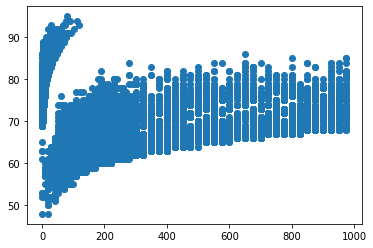

In [28]:
# Your code here:
plt.scatter(x=fifa.ValueNumeric, y=fifa.Potential);

It seems more a logarithmic relationship --> Confirmed by the R2 value???